In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')
#train = pd.merge(train_1, greeks, on = 'Id')
#test = pd.merge(test_1, greeks, on = 'Id')

In [4]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
train.shape

(617, 58)

In [6]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [8]:
train['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [9]:
train = train.drop('Id', axis=1)

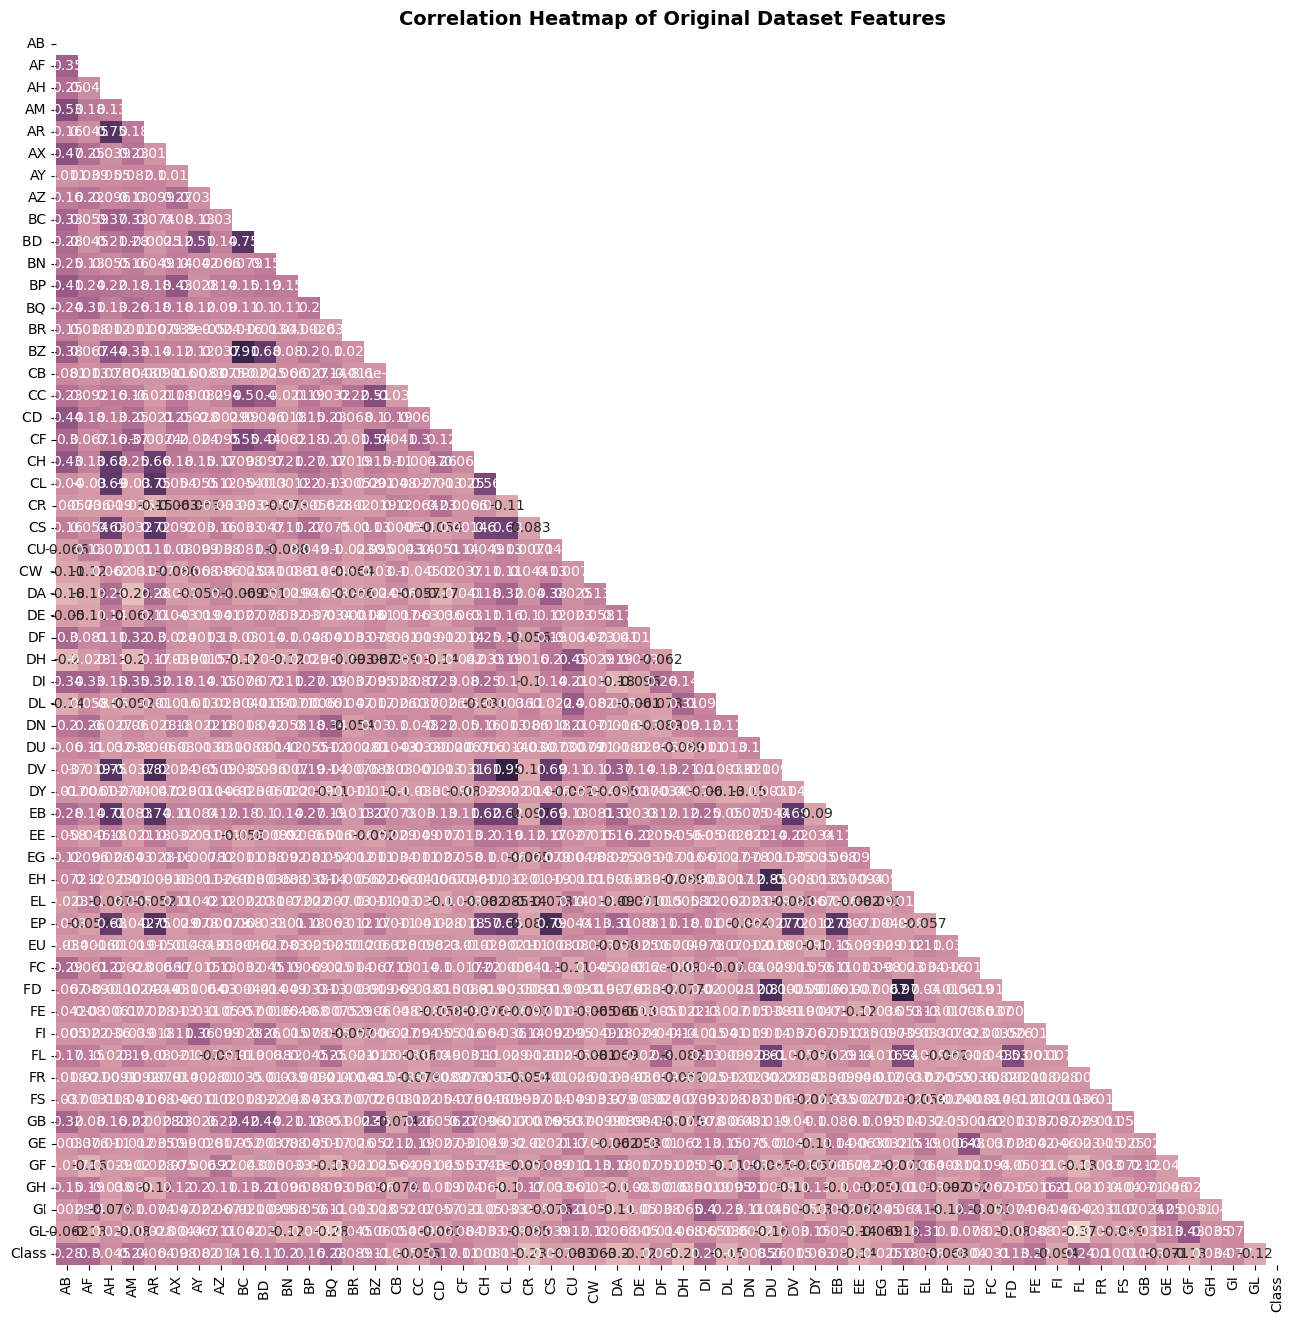

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
plt.title("Correlation Heatmap of Original Dataset Features", weight = 'bold', size = 14)
plt.show()

In [11]:
# Calculate the number of samples for each label.
neg, pos = np.bincount(train['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.86


In [12]:
X = train.drop(['Class'], axis=1)
y = train['Class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [14]:
categorical_cols = X_train.select_dtypes(include="object").columns
numerical_cols = X_train.select_dtypes(exclude="object").columns

In [15]:
import xgboost 
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA

numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                                  ('std_scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])




clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('log_reg', LogisticRegression())
                     ])

clf.fit(X_train, y_train)

preds = clf.predict(X_val)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, preds)

print("Accuracy:", accuracy)

Accuracy: 0.8790322580645161


In [16]:
train_prepared = preprocessor.fit_transform(X_train)
val_prepared = preprocessor.transform(X_val)
test_prepared = preprocessor.transform(test)

In [17]:
from sklearn.decomposition import PCA
pca =PCA()
pca.fit(train_prepared)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

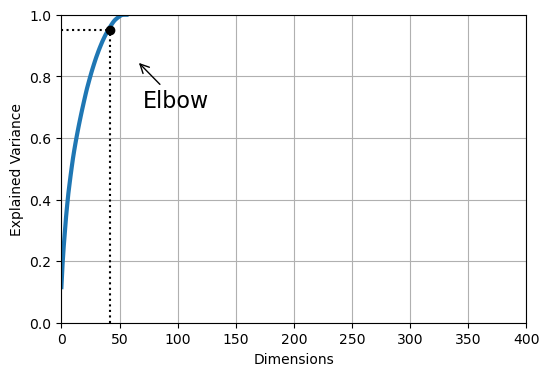

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [19]:
pca = PCA(n_components=40)

X_reduced = pca.fit_transform(train_prepared)
val_reduced =pca.transform(val_prepared)
test_reduced=pca.transform(test_prepared)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

params = {'penalty':['l1', 'l2', 'elasticnet', None],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         }
grid = RandomizedSearchCV(LogisticRegression(), params, verbose=2, cv=3)
grid.fit(X_reduced,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .....................penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .....................penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .............................penalty=l1, solver=sag; total time=   0.0s
[CV] END .............................penalty=l1, solver=sag; total time=   0.0s
[CV] END .............................penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........................penalty=None, solver=saga; total time=   0.1s
[CV] END ..........................penalty=None, solver=saga; total time=   0.1s
[CV] END ..........................penalty=None,

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=2)

In [21]:
grid.best_params_

{'solver': 'liblinear', 'penalty': 'l2'}

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [23]:
for i, (train_index, valid_index) in enumerate(kf.split(X=X_reduced)):
    model = LogisticRegression(solver ='lbfgs', penalty = 'l2')
    model.fit(X_reduced, y_train)
    preds = model.predict(X_reduced)
    val_preds = model.predict(val_reduced)

In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, val_preds)

print("Accuracy:", accuracy)

Accuracy: 0.8709677419354839


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        97
           1       0.79      0.56      0.65        27

    accuracy                           0.87       124
   macro avg       0.84      0.76      0.79       124
weighted avg       0.86      0.87      0.86       124



In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_reduced, y_train, cv=5, scoring='accuracy')

array([0.87878788, 0.84848485, 0.90909091, 0.8877551 , 0.84693878])

In [27]:
final_predictions = model.predict(test_reduced)

In [28]:
class_0_probabilities = 1 - final_predictions
class_1_probabilities = final_predictions

In [29]:
output = pd.DataFrame({'Id':test.Id, "class_0":class_0_probabilities, 'class_1':class_1_probabilities})
output.to_csv("submission.csv", index=None)